<a href="https://colab.research.google.com/github/vbanai/Unsupervised-Learning-Clustering-GANS-Autoencoder/blob/main/Italian_wine_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "viktorbanai" # username from the json file
os.environ['KAGGLE_KEY'] = "9431db56af1a1a63cab88b4e516a2248" # key from the json file
!kaggle datasets download -d harrywang/wine-dataset-for-clustering # api copied from kaggle


  0% 0.00/4.36k [00:00<?, ?B/s]
100% 4.36k/4.36k [00:00<00:00, 8.25MB/s]


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [3]:
!mkdir file_destination
!unzip -u "/content/wine-dataset-for-clustering.zip" -d "/content/file_destination"

Archive:  /content/wine-dataset-for-clustering.zip
  inflating: /content/file_destination/wine-clustering.csv  


In [4]:
wine_dataset=pd.read_csv("/content/file_destination/wine-clustering.csv")
wine_dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.Alcohol=wine_dataset.Alcohol
df2=df[df.Alcohol>14]
df2

In [6]:
wine_dataset.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
wine_dataset.skew()  #Skewness > zero = that there is more weight in the left side of the data. Skewness < zero =  there is more weight in the right side of the data


Alcohol                -0.051482
Malic_Acid              1.039651
Ash                    -0.176699
Ash_Alcanity            0.213047
Magnesium               1.098191
Total_Phenols           0.086639
Flavanoids              0.025344
Nonflavanoid_Phenols    0.450151
Proanthocyanins         0.517137
Color_Intensity         0.868585
Hue                     0.021091
OD280                  -0.307285
Proline                 0.767822
dtype: float64

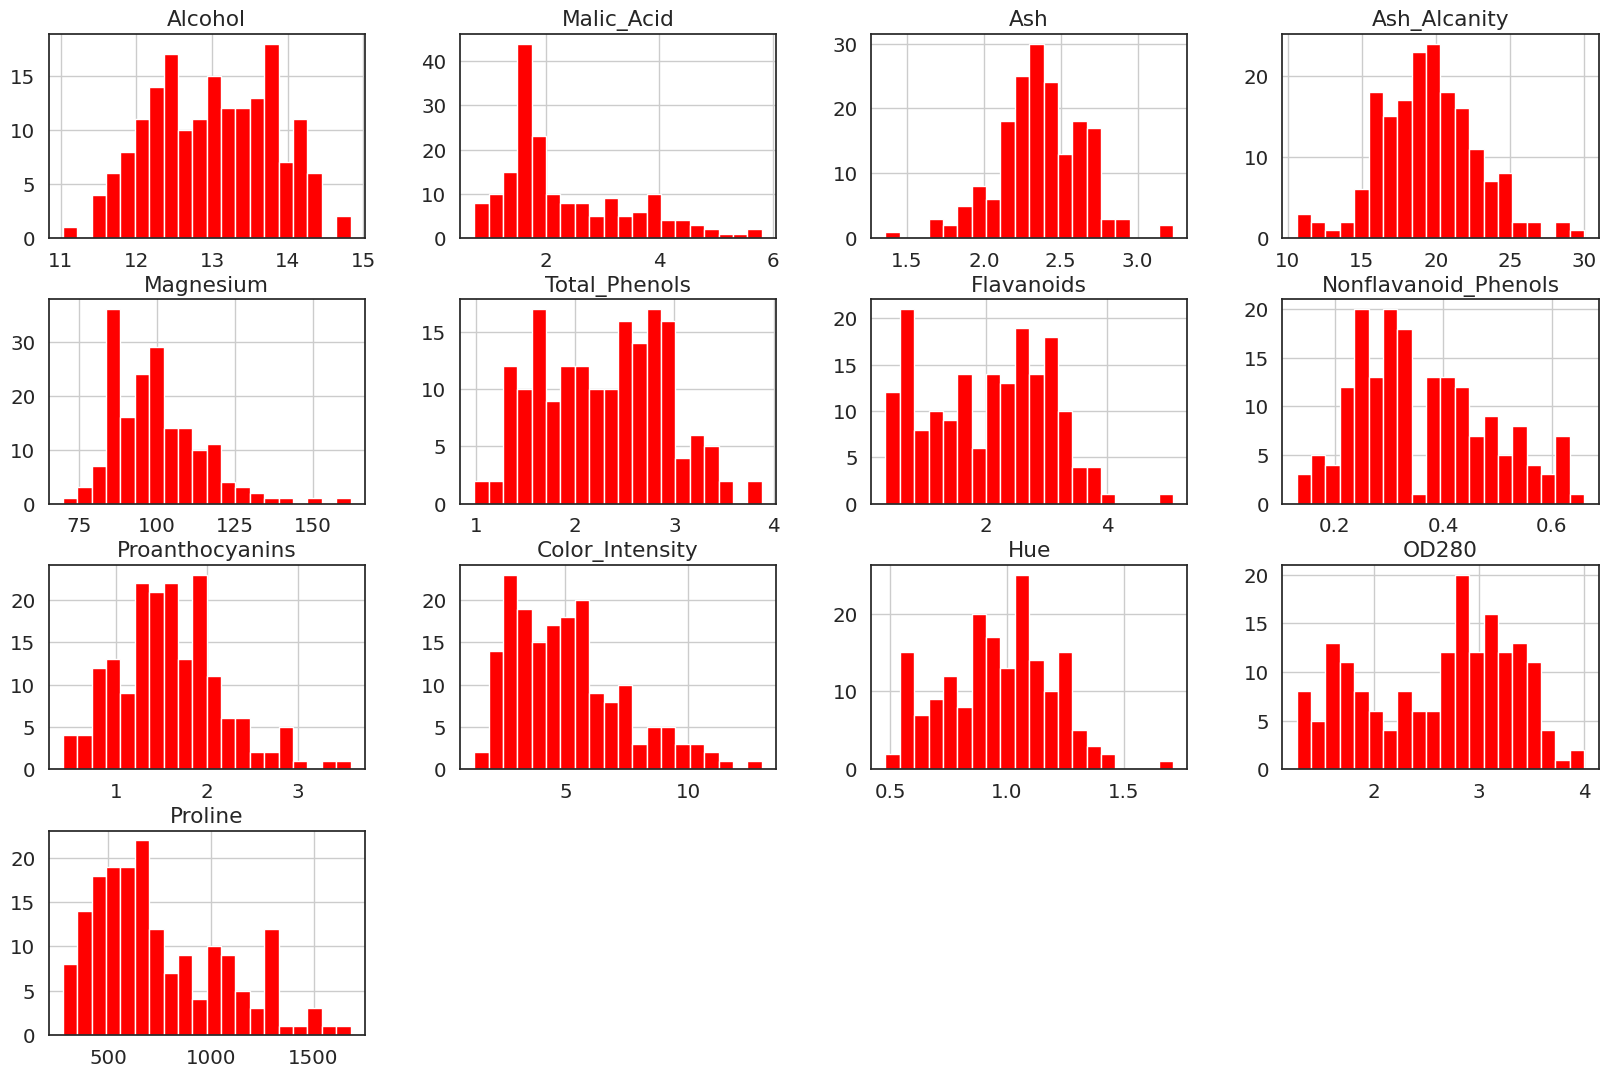

In [8]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,13)})
ax=wine_dataset.hist(bins=20,color='red' )

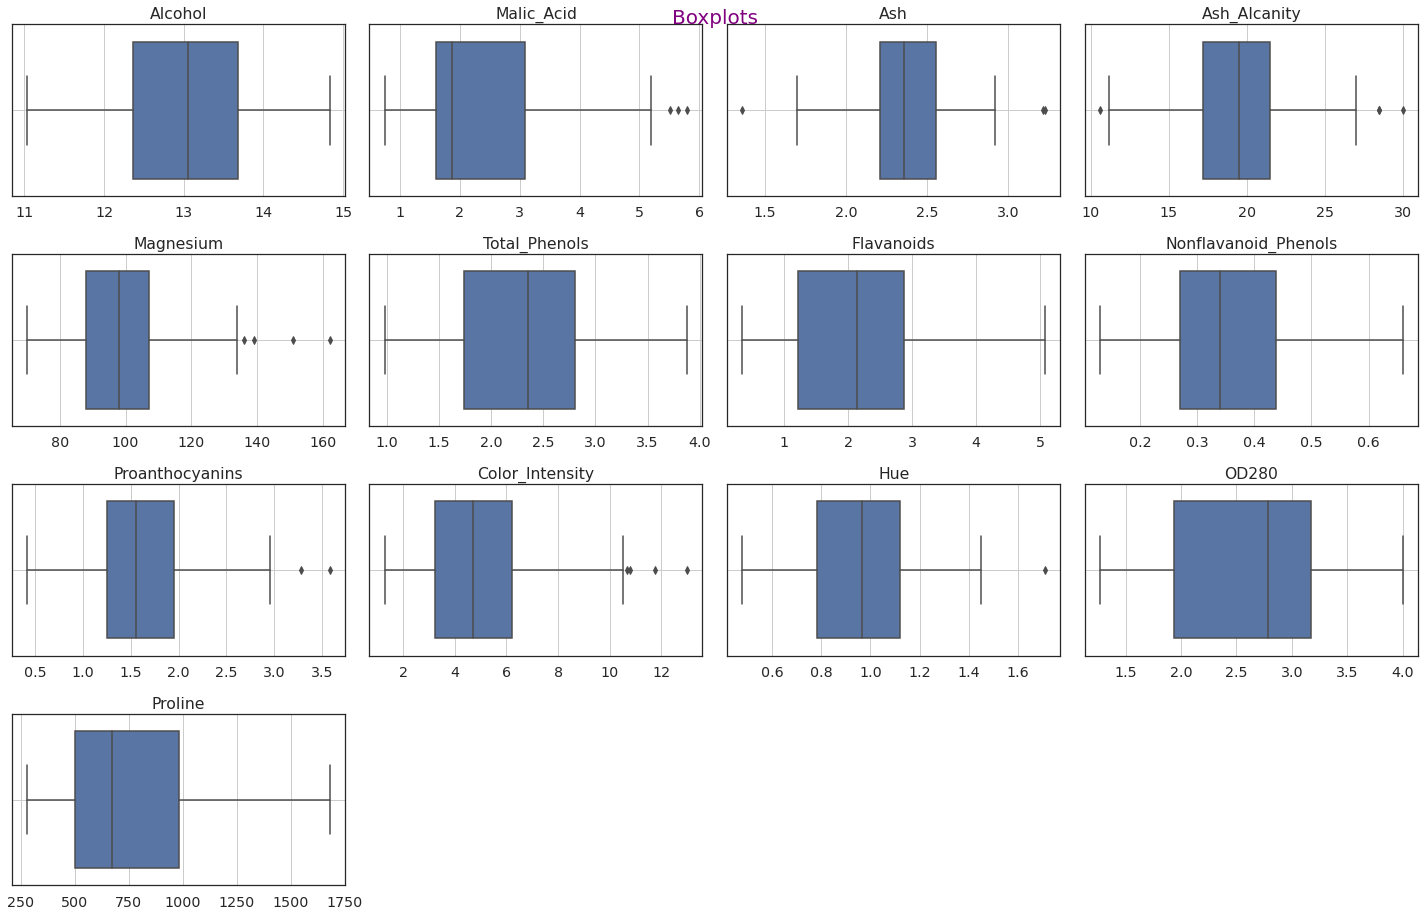

In [ ]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,13)})



plt.figure(figsize=(20, 13))
plt.suptitle('Boxplots', fontsize=20, color='purple')
t=[column for column in wine_dataset]
for i in range(13):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=wine_dataset[t[i]])
    plt.ylabel(None)
    plt.xlabel(None)
    plt.title(t[i])
    plt.grid()
    
plt.tight_layout()



In [9]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
data_cluster=wine_dataset.copy()
data_cluster[data_cluster.columns]=std_scaler.fit_transform(data_cluster)

In [ ]:
#Checking if the Standardization was made correctly, check if the  mean=0 and std=1
data_cluster.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.247442e-18,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [66]:
#Principal Component Analysis to reduce its dimension and make it "plottable" 

from sklearn.decomposition import PCA
pca_2 = PCA(2)
pca_2_result = pca_2.fit_transform(data_cluster)

print ('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Cumulative variance explained by 2 principal components: 55.41%


In [67]:
#making PD from numpy
pca_2_result_df = pd.DataFrame(pca_2_result, columns=["PC1", "PC2"])

pca_2_result_df

,PC1,PC2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
...,...,...
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347


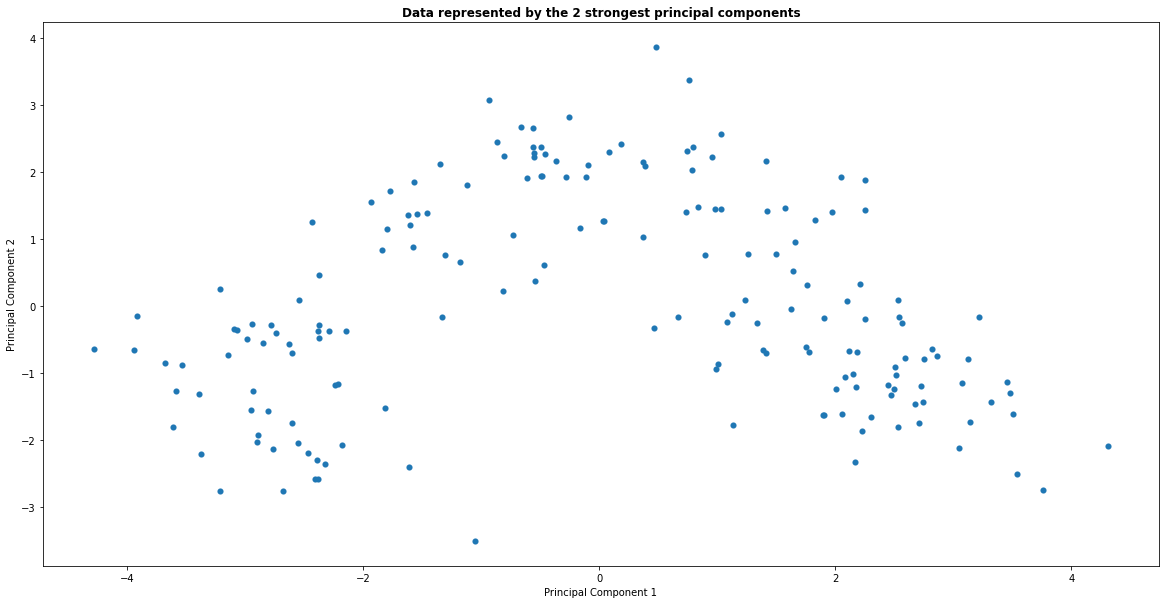

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.scatter(pca_2_result_df.PC1, pca_2_result_df.PC2, lw=0.1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data represented by the 2 strongest principal components',fontweight='bold')
plt.show()

In [68]:
sse = []  #sum of squarred error
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(pca_2_result_df)
    sse.append(km.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [69]:
#silhouette score to validate the elbow rule
from tqdm import tqdm
from sklearn.metrics import silhouette_score
import sklearn.cluster as cluster

silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(data_cluster)
    silhouette[i] = silhouette_score(data_cluster, kmeans.labels_, metric='euclidean')



  0%|          | 0/8 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 25%|██▌       | 2/8 [00:00<00:00, 17.98it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  w

In [ ]:
silhouette

Text(0.5, 0, 'Number of Clusters')

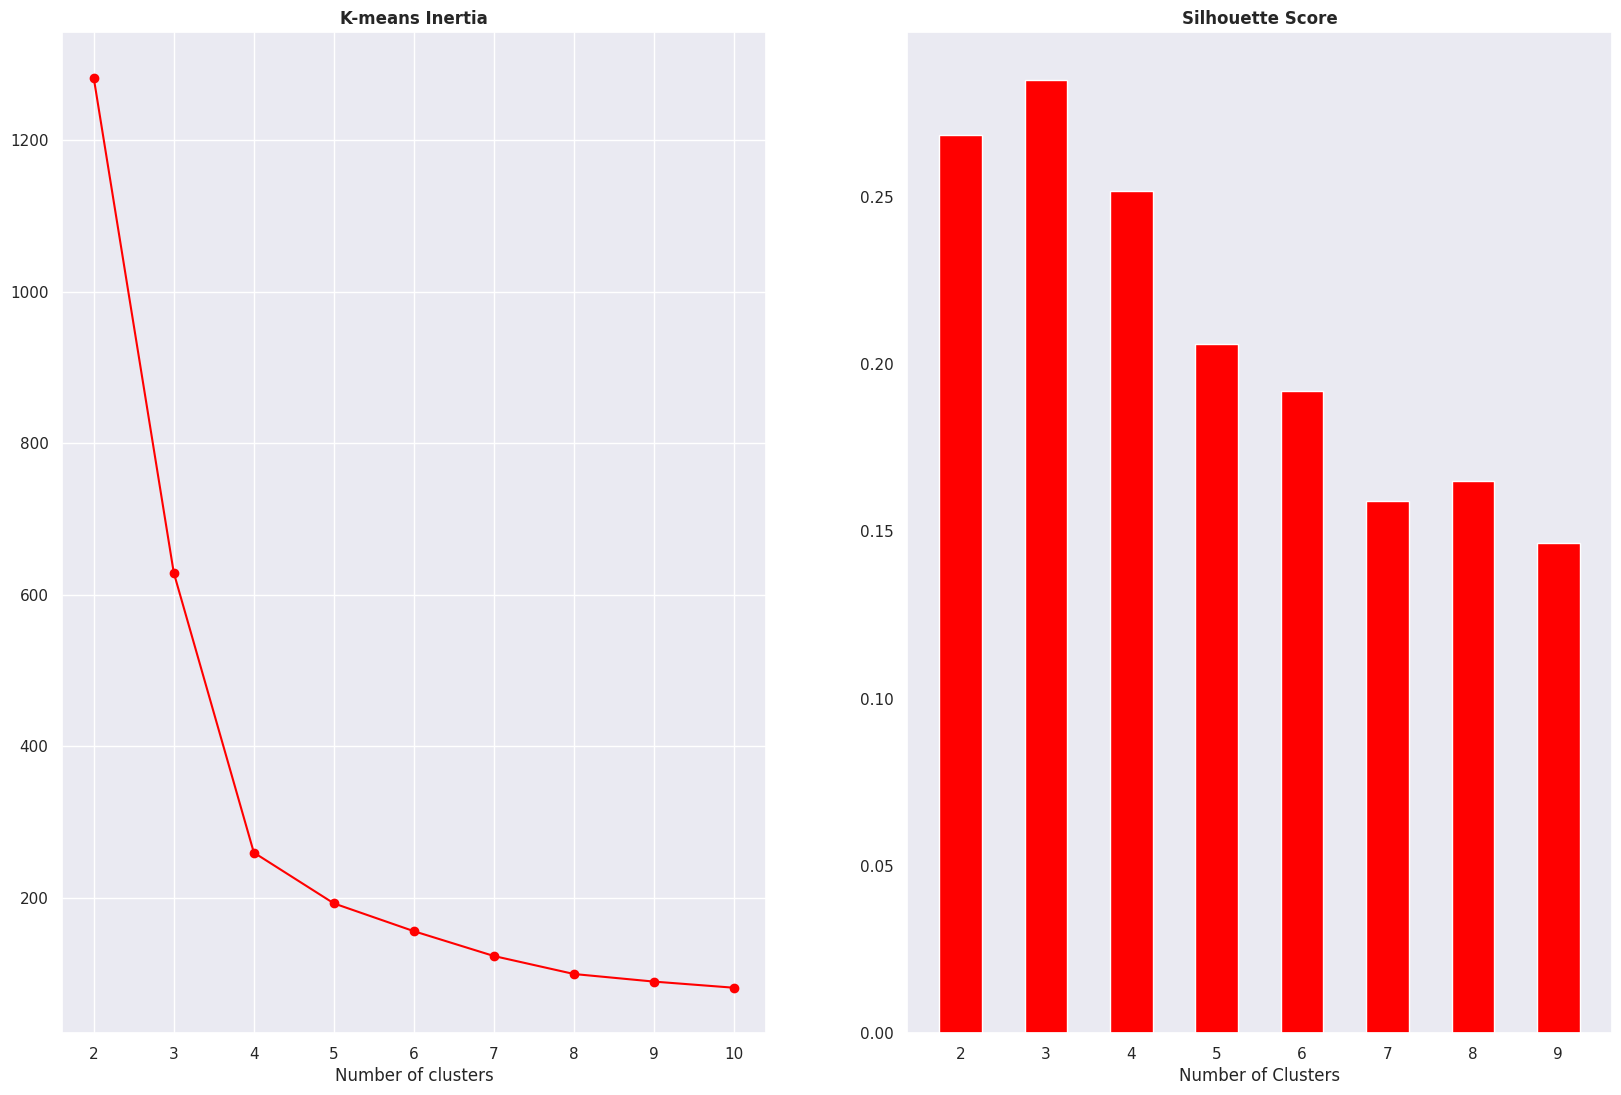

In [70]:
#sns.set(style='white',font_scale=1.1, rc={'figure.figsize':(16,5)})

plt.subplot(1, 2, 1)

plt.plot(range(2,len(k_rng)+2), sse, marker='o',color='red')
plt.xlabel('Number of clusters')
plt.title('K-means Inertia',fontweight='bold')
plt.grid(True)

plt.subplot(1, 2, 2)

plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'red',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Silhouette Score',fontweight='bold')
plt.xlabel('Number of Clusters')

In [ ]:
for column in wine_dataset:
  for index, value in wine_dataset[column].iteritems():
    print(index, value)
    
  break

In [ ]:


km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(pca_2_result_df)
#data_cluster2['cluster']=y_predicted
#cluster_numbers = data_cluster2.pivot_table(columns=['cluster'], aggfunc='size')
#print(cluster_numbers)
y_predicted

In [ ]:
pd.Series(y_predicted).value_counts()

In [72]:

centroids=km.cluster_centers_
centroids_pca = pca_2.fit_transform(centroids)
centroids_pca


array([[ 2.65815364, -0.75469453],
       [-2.35266161, -1.09255587],
       [-0.30549202,  1.8472504 ]])

In [73]:
pca_2_result_df_forclusters=pca_2_result_df.copy(deep=True)
pca_2_result_df_forclusters['cluster']=y_predicted
cluster_numbers = pca_2_result_df_forclusters.pivot_table(columns=['cluster'], aggfunc='size')
print(cluster_numbers)


cluster
0    49
1    64
2    65
dtype: int64


In [74]:
df1=pca_2_result_df_forclusters[pca_2_result_df_forclusters.cluster==0]
df2=pca_2_result_df_forclusters[pca_2_result_df_forclusters.cluster==1]
df3=pca_2_result_df_forclusters[pca_2_result_df_forclusters.cluster==2]

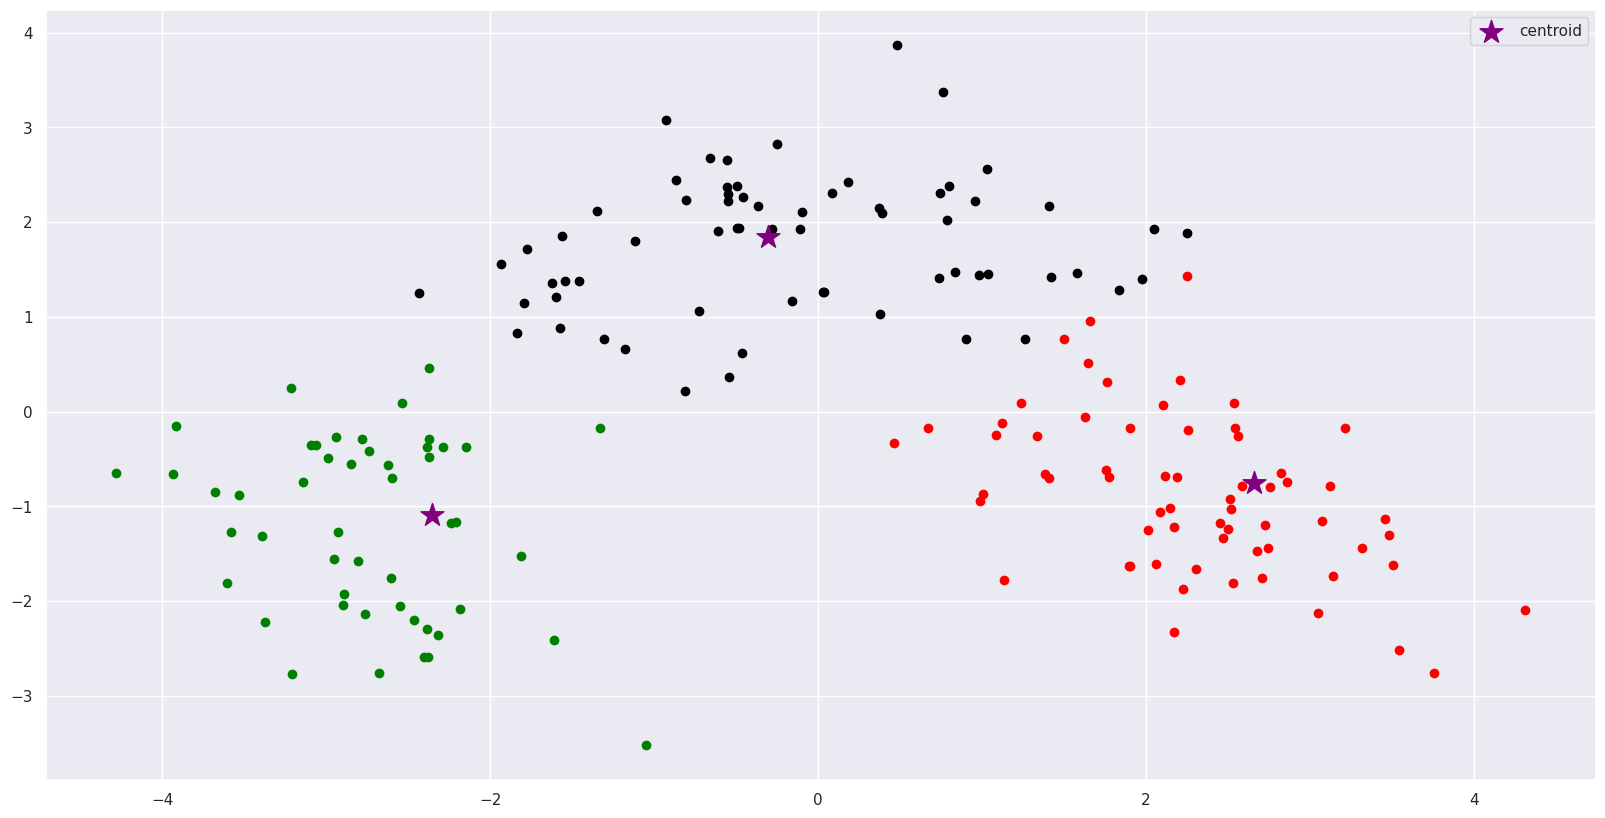

In [75]:
plt.figure(figsize=(20, 10))
plt.scatter(df1.PC1, df1.PC2, color='green')
plt.scatter(df2.PC1, df2.PC2, color='red')
plt.scatter(df3.PC1, df3.PC2, color='black')
plt.scatter(centroids_pca[:,0],centroids_pca[:,1],color='purple',marker='*', s=300, label='centroid')
plt.legend()


Playing with 5 components</br>

Applying dimensionality reduction to carry out better segmentation, using PCA scores</br>
</br>
Determine the most important components

In [ ]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(data_cluster)

In [12]:
#PCA creates importance regarding the features
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

Text(0, 0.5, 'Cumulated Explained Variance')

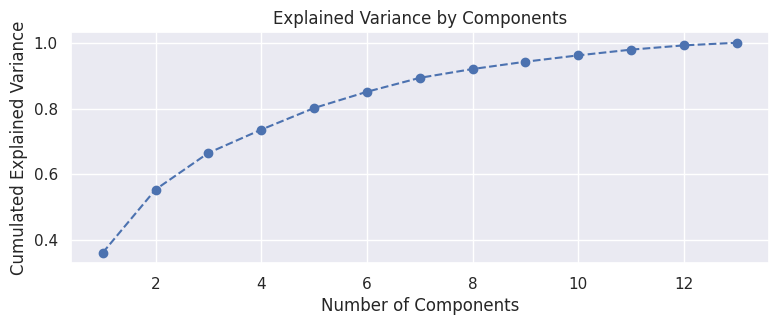

In [22]:
#Finding a subset of components, while preserving variance as much as possible
import seaborn as sn
sn.set()
plt.figure(figsize=(9,3))
plt.plot(range(1,14), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle="--")
plt.title("Explained Variance by Components")
plt.xlabel('Number of Components')
plt.ylabel('Cumulated Explained Variance')

This chart helps to determine how many components we should keep in our dimensionality reduction. If we choose 7 components we preserve 90% variance. (Rule of thumb: keep 80% of the variance)

In [23]:
pca=PCA(n_components=5)
pca.fit(data_cluster)

PCA(n_components=5)

In [24]:
pca.components_
# array 5 x 13 as we reduced the features to 5

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ]])

In [28]:
#LOADING: correlation between an original variable and a component
# First value of the array /0.1443294/ shows the loading of the first feature on the first component 

df_pca_comp=pd.DataFrame(data=pca.components_, columns=data_cluster.columns,
                         index=['Component_1','Component_2', 'Component_3', 'Component_4', 'Component_5'])

df_pca_comp  # shows the correlations


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Component_1,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
Component_2,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903
Component_3,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
Component_4,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071
Component_5,-0.265664,0.035214,-0.143025,0.066103,0.727049,-0.149318,-0.109026,-0.500703,0.136860,-0.076437,-0.173615,-0.101161,-0.157869


([<matplotlib.axis.YTick at 0x7fa9c6023bb0>,
 [Text(0, 0, 'Component_1'),
  Text(0, 1, 'Component_2'),
  Text(0, 2, 'Component_3'),
  Text(0, 3, 'Component_4'),
  Text(0, 4, 'Component_5')])

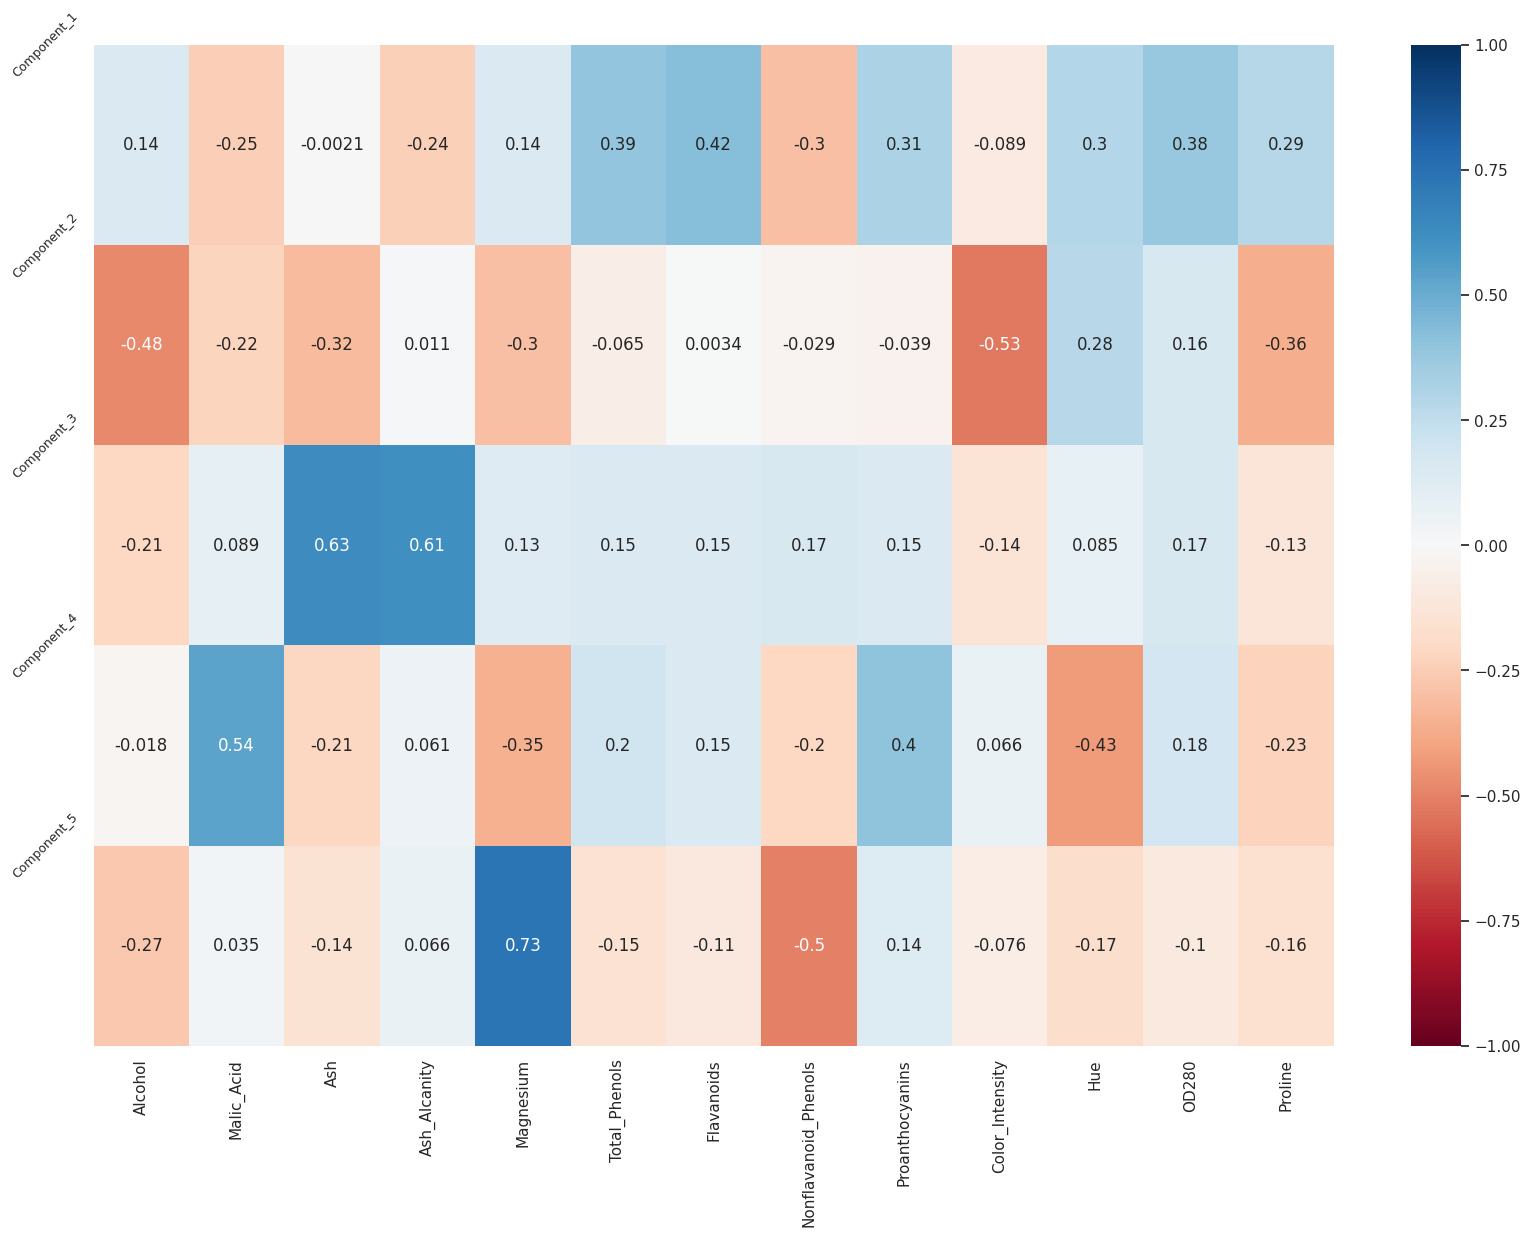

In [33]:
sns.heatmap(df_pca_comp, vmin=-1, vmax=1, cmap='RdBu', annot= True)
plt.yticks([0,1,2,3,4], 
           ['Component_1', 'Component_2', 'Component_3' , 'Component_4', 'Component_5'], rotation=45, fontsize=9)


There is positive correlation between Component 1 and Total_Phenols, Flavanoids, Proanthocyanins, Hue, OD280 and Proline</br>
Regarding Compoenent 5, only feature 5 (Magnesium) is highly correlated with this comp.

In [36]:
#pca class has a built in method to transform our data in a desired way.
#The result is a new array, when each observation is described by the 5 components, that's why we have 5 columns 5 features
scores_pca=pca.transform(data_cluster)

K-means clustering with PCA

In [ ]:
#componenet scores are standardized by definition
wcss=[]
for i in range(1,11):
  kmeans_pca=KMeans(n_clusters=i, init="k-means++", random_state=42)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

Text(0, 0.5, 'WCSS')

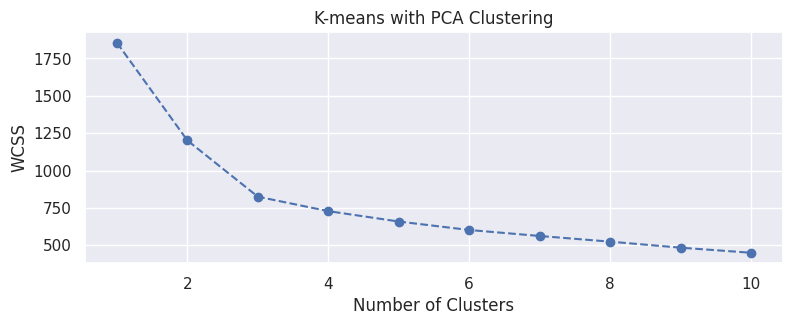

In [40]:
plt.figure(figsize=(9,3))
plt.plot(range(1,11), wcss, marker='o', linestyle="--")
plt.title("K-means with PCA Clustering")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [65]:
kmeans_pca=KMeans(n_clusters=3, init="k-means++", random_state=42)
kmeans_pca.fit(scores_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [50]:
df_segm_pca_kmeans=pd.concat([data_cluster.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-5:]=['Component_1', 'Component_2', 'Component_3', 'Component_4', 'Component_5']
df_segm_pca_kmeans['Segment K-means PCA']=kmeans_pca.labels_

In [51]:
df_segm_pca_kmeans

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Component_1,Component_2,Component_3,Component_4,Component_5,Segment K-means PCA
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,3.316751,-1.443463,-0.165739,-0.215631,0.693043,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2.209465,0.333393,-2.026457,-0.291358,-0.257655,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2.516740,-1.031151,0.982819,0.724902,-0.251033,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,3.757066,-2.756372,-0.176192,0.567983,-0.311842,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1.008908,-0.869831,2.026688,-0.409766,0.298458,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,0
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,-2.601956,-1.757229,0.207581,0.349496,0.255063,0
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,0


In [56]:
df_segm_pca_kmeans_freq=df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Component_1,Component_2,Component_3,Component_4,Component_5
Segment K-means PCA,,,,,,,,,,,,,,,,,,
0,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088,-2.720036,-1.125651,-0.239093,0.062457,0.073676
1,0.835232,-0.303810,0.364706,-0.610191,0.577587,0.885237,0.977820,-0.562090,0.580287,0.171063,0.473984,0.779247,1.125185,2.276194,-0.932054,0.001528,-0.135498,-0.134912
2,-0.926072,-0.394042,-0.494517,0.170602,-0.491712,-0.075983,0.020813,-0.033534,0.058266,-0.901914,0.461804,0.270764,-0.753846,-0.036957,1.772239,0.186139,0.080240,0.070878


In [ ]:
centroids=kmeans_pca.cluster_centers_
centroids_pca = pca_2.fit_transform(centroids)
centroids_pca

Text(0.5, 1.0, 'Clusters by PCA components')

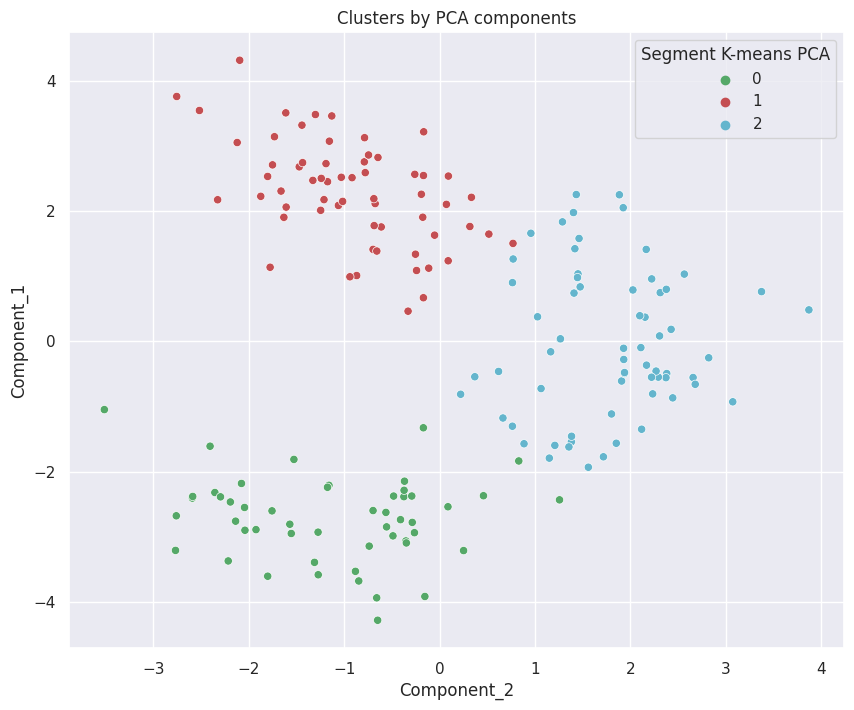

In [64]:

plt.figure(figsize=(10, 8))
sns.scatterplot(df_segm_pca_kmeans, x='Component_2', y='Component_1', hue=df_segm_pca_kmeans['Segment K-means PCA'], palette=['g', 'r', 'c'])
plt.scatter(centroids_pca[:,0],centroids_pca[:,1],color='purple',marker='*', s=300, label='centroid')
plt.title('Clusters by PCA components')

Get almost the same result with 5 components compared to the 2 components